# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question.
- Show all code necessary for the analysis, but remove superfluous code

---
## 1

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), build a linear regression model to predict *reaction time* based on all the other variables. 

<ul>
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous variables   
<li> b) check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and specifically what you see for this model.
<li> c) check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> d) plot the actual vs. predicted reaction times, as well as print out the mean absolute error and $R^2$ for your model for both <it>train</it> and <it>test</it>. How well did your model do based on these metrics, and how can you tell?
<li> e) is your model overfit? How can you tell?
<li> f) make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient).
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

Markdown Answers

(feel free to answer questions ALL in a single markdown cell, or in multiple markdown cells interspersed with the code. Just make sure to clearly mark where you're answering each question.)

In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

In [2]:
# importing data
reactionDF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Data/reactionTime.csv")
reactionDF.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,32,15.75,14,151.99,0,1435.700562
1,48,97.28,4,162.39,0,436.858176
2,35,65.73,18,148.42,1,878.039528
3,33,40.30,13,121.12,0,1056.733539
4,37,82.32,15,139.74,0,633.438797


In [3]:
# Show us number of rows and columns in our data frame
reactionDF.shape

(1000, 6)

## a) Use an 80/20 train test split for model validation and make sure you z score your continuous variables

In [4]:
# Split Data
predictors = ["age", "boredom_rating", "risk_propensity", "height", "left_handed"]

# Train-Test-Split
# Takes all of our data and splits it into a training set and a testing set
# Outputs training set for our predictors, testing set for our predictors, 
    # training set for our outcomes, testing set for our outcomes
# Use train, test, split fucntion and give it all our predictors and outcome 
    # (reaction_time in this case), and tell it how big we want our test set to be 
    # (20% in test set in this case)
X_train, X_test, y_train, y_test = train_test_split(reactionDF[predictors], reactionDF["reaction_time"], test_size=0.2)

In [5]:
#how many rows and columns in our training set (80% of rows and columns)
X_train.shape

(800, 5)

In [6]:
#how many rows and columns in our test set (20% of rows)
X_test.shape

(200, 5)

In [7]:
y_train.shape

(800,)

In [8]:
y_test.shape

(200,)

In [142]:
# Includes only the predictors and only the rows that are included in our training set
# Use this to build and train our model
X_train.head()

,age,boredom_rating,risk_propensity,height,left_handed
795,27,85.49,9,180.79,0
342,30,84.80,13,152.60,0
23,27,56.21,15,140.30,0
848,31,80.52,19,168.23,0
168,33,31.36,15,167.22,0


In [143]:
# Make sure you z score your continuous variables
# After creating train and test set, but before fitting model, we can z-score 
zscore = StandardScaler()
# ONLY FITTING ON TRAINING SET
zscore.fit(X_train)
# Use this to actually create the z-scores for the train and test set
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

# Create model
lr = LinearRegression()
# Fit model
model = lr.fit(Xz_train, y_train)

## b) Check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and specifically what you see for this model.

Linear assumption means that the relationship between our variables (predictors and outcomes) is linear. What we are trying to see in terms of linear assumtpion is heteroskedasticity and linearity.

While in homoscedacity, the errors of the model are evenly spread across the different values that our model can predict, not a certain range of values for which our model is way worse or way better at predicting, heteredescacity describes how the errors are more likely/concentrated in certain areas than other. If the there are less errors for lower reaction times than higher reactionntimes, we know that our model will be much more accurate for predicting lower reaction times.

We can also assess linearity by checking each individual predictor and look for any clear indication for patterns on non-linearity. This means that we can look for pattersn that don't show a clear linear realtionship between the predictor and the outcome.

We will plot the graphs for each individual predictor and then make our observations.

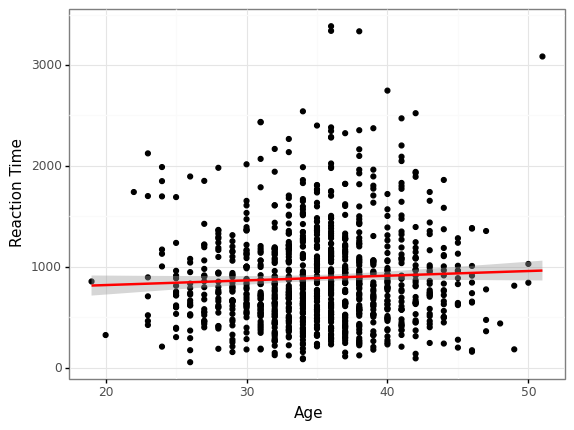

<ggplot: (8775130034077)>

In [144]:
# Checking for linearity with age as predictor
(ggplot(reactionDF, aes(x = "age", y = "reaction_time")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(x = "Age", y = "Reaction Time"))

The linearity assumption for the continuous variable, age, was violated within this model. 

This is because we are looking for a clear linear relationship between the age (predictor) and reaction time (outcome). There is too much of a spread of data points in this graph, therefore there is a non-linear relationship between age and reaction time.

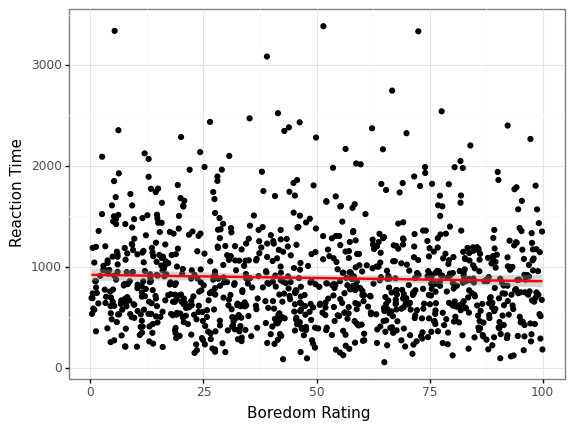

<ggplot: (8775128164069)>

In [145]:
# Checking for linearity with boredom_rating as predictor
(ggplot(reactionDF, aes(x = "boredom_rating", y = "reaction_time")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(x = "Boredom Rating", y = "Reaction Time"))

The linearity assumption for the continuous variable, boredom rating, was violated within this model. 

This is because we are looking for a clear linear relationship between the boredom rating (predictor) and reaction time (outcome). There is too much of a spread of data points in this graph, therefore there is a non-linear relationship between boredom rating and reaction time.

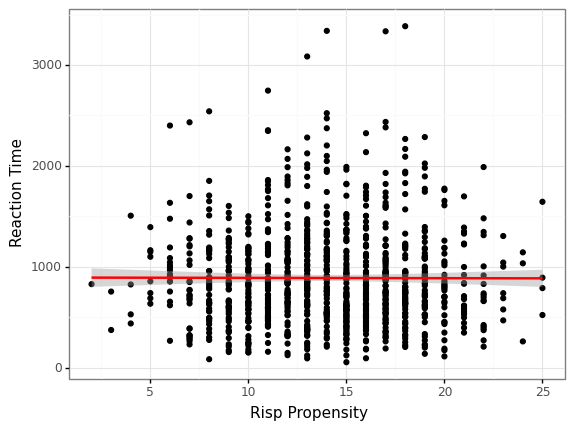

<ggplot: (8775128169793)>

In [146]:
# Checking for linearity with risk_propensity as predictor
(ggplot(reactionDF, aes(x = "risk_propensity", y = "reaction_time")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(x = "Risp Propensity", y = "Reaction Time"))

The linearity assumption for the continuous variable, risk propensity, was violated within this model. 

This is because we are looking for a clear linear relationship between the risk propensity (predictor) and reaction time (outcome). There is too much of a spread of data points in this graph, therefore there is a non-linear relationship between risk propensity and reaction time.

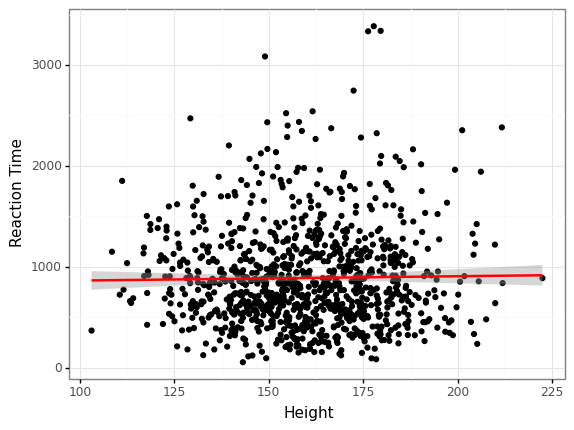

<ggplot: (8775130784873)>

In [147]:
# Checking for linearity with height as predictor
(ggplot(reactionDF, aes(x = "height", y = "reaction_time")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(x = "Height", y = "Reaction Time"))

The linearity assumption for the continuous variable, height, was violated within this model. 

This is because we are looking for a clear linear relationship between the height (predictor) and reaction time (outcome). There is too much of a spread of data points in the middle of the graph (creating an amorphous blob of points), therefore there is a non-linear relationship between height and reaction time.

## c) Check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.

In [148]:
# Predictions
# Grab predictions for the test set because we want to know how well our model did, not on the data it was trained on, but on data it has never seen before
y_pred = lr.predict(Xz_test) 
y_pred[1:10]

array([904.77723031, 864.62792889, 882.21405608, 875.27599893,
       892.77818805, 928.30227293, 890.37044131, 895.23289741,
       886.71475095])

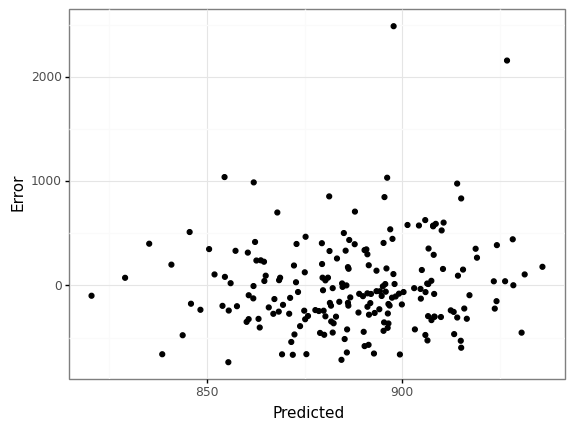

<ggplot: (8775126918237)>

In [149]:
# Make residual plot
# Residual is just the difference between what we predicted and the actual value
assump = pd.DataFrame({"error": y_test - y_pred, "predicted": y_pred})
ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(x = "Predicted", y = "Error")

As discussed previously, heteroskedasticity means that the variation of the errors across all possible predicted values are not the same. The heteroskedasticity within this residual plot, which is the difference between what we predicted and the actual value, showcases how there is no clear pattern within this model. 

After checking to see if there are any non-linear patterns in the realtionship after fitting the model between the predicted and the actual value, the error of variance seems to be constant within the model regardless of the residual value. As there is quite an even spread of values, it seems like the homoskedasticity assumption is not quite violated. This means that the errors of the model are evenly spread across the different values that our model can predict. So, no matter if we are predicting for low or high reaction times, the error in predicting will be about the same.

Since there is quite a large variability, our model is often wrong.

## d) Plot the actual vs. predicted reaction times, as well as print out the mean absolute error and $R^2$ for your model for both and . How well did your model do based on these metrics, and how can you tell?

In [150]:
# Make dataframe that has our predicted values vs the actual values, and then make a ggplot of it
true_vs_pred = pd.DataFrame({"predict": y_pred,"actual": y_test})
true_vs_pred.head()

,predict,actual
195,874.931635,633.134880
117,904.777230,778.693029
928,864.627929,1092.599586
505,882.214056,856.607909
779,875.275999,1342.815990


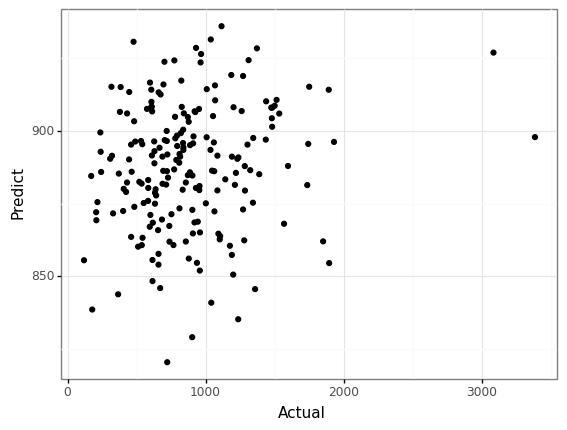

<ggplot: (8775127366981)>

In [151]:
#this refelcts our r2 score where there is a lot of spread in these values 
    #lot of variability, so our model is often wrong
#if model were absolutely perfect we would see a straight line of data points 
(ggplot(true_vs_pred, aes(x = "actual", y = "predict")) + geom_point() + theme_bw() + labs(x = "Actual", y = "Predict"))

In [152]:
# Mean squared error is used to assess how well our model is doing
# Pass test values and predicted test values as parameters
# Mean squared error is always in terms of whatever the units are of the varaible that we are predicting
# In this case, it is in reaction time units becasue we are predictiing reaction time
mean_squared_error(y_test, model.predict(Xz_test))

191983.20795668112

In [153]:
# Testing r2
# Model not doing so well
# R2 score is interpreted as whether our model is doing better than just predicting the mean for eveything
# The higher the score is, the closer 1, the better it is predicting; 
# A score close to 0 means it's doing no better than just predicting the mean each time
# Since the score is close to 0, it's doing no better than just predicting the mean each time
r2_score(y_test, y_pred)

0.01281496821459882

In [154]:
# Training R2
# We compare our model on the test set to the training set bc we want to see if there is overfitting
# Overfitting: model fits too well to the training data to the point that it doesn't do well on unseen data at all
# The difference between training and testing set is not too much, so there is not much of overfitting 
r2_score(y_train, model.predict(Xz_train))

0.0020494822843110105

In [155]:
model.score(Xz_test, y_test) #testing R2

0.01281496821459882

In [156]:
model.score(Xz_train, y_train) #training R2

0.0020494822843110105

Just looking at the graph, which refelcts our R^2 score, there is a lot of spread and variability in these values. This means that so our model is often wrong. If the model were absolutely perfect we would see a straight line of data points 

The mean squared error is a measure of how well our model is doing (model success). This means that if we have a low MSE, our model is doing well, and if we have a high MSE, our model isn't doing too great.

R^2 is a unitless way of assessing how well our model did by showing us the percentage of varaition accounted for by our model. R^2 score is interpreted as whether our model is doing better than just predicting the mean for eveything. The higher the score is (the closer to 1), the better it is at predicting, therefore it has great performance. A score close to 0 means it's doing no better than just predicting the mean each time, therefore it has poor performance.

Looking at the model, the MSE is 191983.21, which is extremly high, so our model is not predicting the test set very well on the trained model. Even though there is no specific range of values a mean square error should be within, we can tell that the model is not doing well because the extent of the reaction time when looking at the graph above is about 3500. The R^2 for the testing model comes to be 0.0128, showcasing that our model is performing very poorly. This means that the testing model does not follow the trend of the data, so it fits worse than the linear regression line. So our model, which has a score closer to 0, is doing no better than predicting th mean each time. We would like R^2 to be as close to 1 as possible because the model would be doing better than just predicting the mean each time. Instead, the MSE and R^2 values are indicating that the model is performing poorly at predicting.

## e) Is your model overfit? How can you tell?

By finding the R^2 value for the training set, we can compare it to our model on the test set to the training set because we want to see if there is overfitting. Overfitting means that the model fits too well to the training data to the point that it doesn't do well on unseen data. If there is a huge difference between how the model performs on the training data vs the testing data, this indicates that we might have an overfit model, so the model will be too attuned to one data set and will not be able to generalize well on unseen data.

Because the difference between training and testing set (0.00205 and 0.0128 respectively) in R^2 values is not too much, there is not much of overfitting.

## f) make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient).

In [157]:
coefficients = pd.DataFrame({"Coef":lr.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef": lr.intercept_, "Name": "intercept"}, ignore_index = True)

# If age and height go up, reaction time goes up
# If boredom rating, risk propensity and left handedness go up, reaction time goes up
print(coefficients)

         Coef             Name
0   11.638287              age
1  -15.135340   boredom_rating
2   -2.307390  risk_propensity
3    9.749355           height
4   -5.083580      left_handed
5  888.232048        intercept


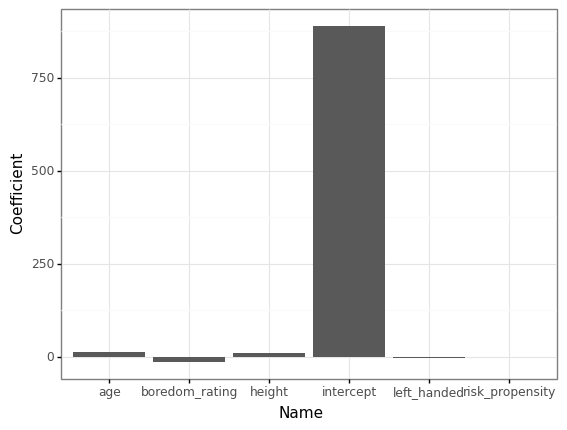

<ggplot: (8775130804645)>

In [158]:
(ggplot(coefficients, aes(x = "Name", y = "Coef")) + geom_bar(stat = "identity") + theme_bw() + labs(x = "Name", y = "Coefficient"))

The coefficient tells us how the reaction time will change in relation to the predictor (age, boredom rating, height, intercept, left-handedness, risk propensity). For example, as age increases by 1 standard devaition, we expect the reaction time to go up by 11.638287. As boredom rating increases by 1 standard devaition, we expect the reaction time to go down by 15.135340. This is because since age and height are positive values, they are positively associated with reaction time. Since boredom rating, risk propensity and left handedness are negative values, they are neagtively associated with reaction time. 

The intercept describes when all of the predicted variables are 0, we would expect the reaction time to be 888.232048.

Coefficients are the way a linear regression model predicts the reaction time. So, it takes the actual predictor values and multiplies them by the coefficients to get the actual reaction time.